Number of unique names:  100
Number of unique artists:  78
-----------------------------------------------------
Top artist with highest average danceability:
                  num_songs  avg_danceability
artists                                      
Drake                     3          0.842333
Bruno Mars                2          0.835500
Calvin Harris             2          0.814500
Kendrick Lamar            2          0.770500
Khalid                    2          0.767000
Maroon 5                  2          0.736000
The Weeknd                2          0.724500
Clean Bandit              2          0.713500
Imagine Dragons           2          0.689500
Luis Fonsi                2          0.677000
The Chainsmokers          4          0.640000
DJ Khaled                 2          0.640000
Ed Sheeran                4          0.627250
Post Malone               2          0.602000
Martin Garrix             3          0.561667
ZAYN                      2          0.496500
-------------

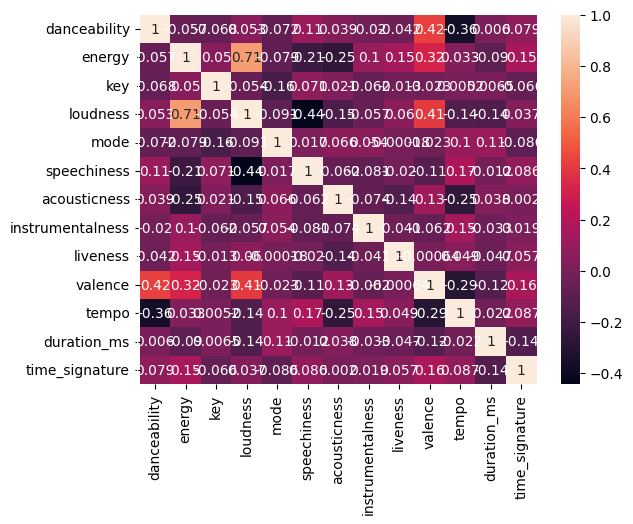

-----------------------------------------------------
Danceability all features model:
                            OLS Regression Results                            
Dep. Variable:           danceability   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     3.612
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           0.000215
Time:                        19:23:26   Log-Likelihood:                 86.703
No. Observations:                 100   AIC:                            -147.4
Df Residuals:                      87   BIC:                            -113.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data
data = pd.read_csv('spotify.csv')
data.head()

# drop the id column
data = data.drop(['id'], axis=1)

# print the data types of the columns
# print(data.dtypes)

num_unique_name = data['name'].nunique()
num_unique_artist = data['artists'].nunique()

print('Number of unique names: ', num_unique_name)
print('Number of unique artists: ', num_unique_artist)


# lets get the top artist (>1 song/ entries) with the ordered in desernding order (draw is decided bt the avg danceability)
print("-----------------------------------------------------")
print("Top artist with highest average danceability:")
# Filter artists with more than one entry
artist_counts = data['artists'].value_counts()
artists_with_multiple_entries = artist_counts[artist_counts > 1].index

# Calculate the average danceability and the number of songs for those artists
top_artists = data[data['artists'].isin(artists_with_multiple_entries)]
top_artists_stats = top_artists.groupby('artists').agg(
    num_songs=('danceability', 'size'),
    avg_danceability=('danceability', 'mean')
).sort_values(by='avg_danceability', ascending=False)

# Display the results
print(top_artists_stats)

# because too many unique names and artists, we will drop them
data = data.drop(['name', 'artists'], axis=1)
data.head()

# print max of each column
print("-----------------------------------------------------")
print("Max of each column:")
print(data.max())

# print the average of each column
print("-----------------------------------------------------")
print("Average of each column:")
print(data.mean())


# correlation matrix heatmap
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

# linear regression for danceability
print("-----------------------------------------------------")
Y = data['danceability']
X = data.drop(['danceability'], axis=1)

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print("Danceability all features model:")
print(model.summary())

print("-----------------------------------------------------")
# using the power of foresight(in real data dont do this) we drop all the feature expect energy, speechiness, valence and tempo
X = data[['energy', 'speechiness', 'valence', 'tempo']]

X = sm.add_constant(X)

model_two = sm.OLS(Y, X).fit()
print("Danceability reduced features mode;(energy, speechiness, valence, tempo):")
print(model_two.summary())

# now we do the same for energy
print("-----------------------------------------------------")
X = data[['speechiness', 'valence', 'tempo']]

X = sm.add_constant(X)

model_three = sm.OLS(Y, X).fit()
print("Energy reduced features model(speechiness, valence, tempo):")
print(model_three.summary())
